# Phân công công việc:
- 1712396_Vũ Duy + 1712376_Phạm Nguyễn Hải Dương: Tiền xử lý dữ liệu, Trực quan hóa dữ liệu và Câu hỏi 1
- 19120207_Hồ Hoàng Duy: Câu hỏi 2
- 1712355_Lâm Thiên Đức: Câu hỏi 3, 4, 5 và xử lý notebook
- 1712258_Nguyễn Văn Hậu: Câu hỏi 6

---

## Tiền xử lý dữ liệu

Thêm các thư viện cần thiết

In [3]:
import json 
import requests
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lấy dữ liệu từ các file

In [4]:
df_pl = pd.read_csv('playlist.csv')
df_u = pd.read_csv('user.csv')
DuyDuong_playlist_df = pd.read_csv('playlist.csv')
DuyDuong_track_df = pd.read_csv('track.csv')
DuyDuong_user_df = pd.read_csv('user.csv')

### Xử lý playlist

***Số dòng và cột***

In [5]:
DuyDuong_playlist_df.shape

(1371, 33)

***Kiểu dữ liệu***

In [6]:
DuyDuong_playlist_df.dtypes

artwork_url          object
created_at           object
description          object
duration              int64
embeddable_by        object
genre                object
id                    int64
kind                 object
label_name           object
last_modified        object
license              object
likes_count           int64
managed_by_feeds       bool
permalink            object
permalink_url        object
public                 bool
purchase_title       object
purchase_url         object
release_date         object
reposts_count         int64
secret_token        float64
sharing              object
tag_list             object
title                object
uri                  object
user_id               int64
set_type             object
is_album               bool
published_at         object
display_date         object
user                 object
tracks               object
track_count           int64
dtype: object

***Ý nghĩa các cột:***

**artwork_url**
- url ảnh nền của playlist (kiểu string, có thể null)

**created_at**
- Ngày tạo (kiểu date)

**description**
- Mô tả (kiểu string, có thể null)

**duration**
- thời lượng play list (kiểu số)

**embeddable_by**
- Có thể nhúng bằng (embeddable_by: "all" | "me" | "none")

**genre**
- Thể  loại

**id**
- Id playlist

**kind**
- thể loại, phải là playlist

**label_name**
- Nhãn playlist

**last_modified**
- Chỉnh sửa lần cuối, thời gian

**license**
- Giấy phép sử dụng

**likes_count**
- Số lượt thích

**managed_by_feeds**

**permalink**

**permalink_url**
- Link vĩnh viễn 

**public**
- Có công khai không

**purchase_title**
- Tiêu đề mua bán

**purchase_url**
- Link mua

**release_date**
- Ngày phát hành

**reposts_count**
- Số lần đăng lại

**secret_token**
- token bí mật

**sharing**
- Đối tượng chia sẻ

**tag_list**
- thẻ tag

**title**
- tiêu đề

**uri**
- uri

**user_id**
- id user tạo playlist

**set_type**
- Thể loại (album, set)

**is_album**
- là album?

**published_at**
- Ngày published

**display_date**
- Ngày phát

**user**
- Thông tin user

**tracks**
- Danh sách track

**track_count**
- Số lượng tracks

***Xử lý trùng lắp***

In [7]:
dup_playlist_DD = DuyDuong_playlist_df.drop_duplicates()

***Xử lý ngoại lệ***

In [8]:
# Xử lý ngày phát hành phải lớn hơn ngày tạo
Exception_df_pl1 = dup_playlist_DD.query("created_at<=last_modified")
# Xử lý ngày được phát hành phải lớn hơn ngày tạo
DuyDuong_playlist_df = Exception_df_pl1.query("created_at <= published_at")

***Tính phân vị***


In [9]:
#duration
df_playlist_duration = DuyDuong_playlist_df.duration.describe()
#track_count
df_playlist_track_count = DuyDuong_playlist_df.track_count.describe()

def duration(row):
    duration=df_playlist_duration[row]
    return duration.round(1)

def track_count(row):
    track_count=df_playlist_track_count[row]
    return track_count

data = {'duration': pd.Series([duration('min'), duration('25%'), duration('50%'), duration('75%'), duration('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'track_count': pd.Series([track_count('min'), track_count('25%'), track_count('50%'), track_count('75%'), track_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_playlist_df = pd.DataFrame(data)
per_playlist_df

,duration,track_count
min,8412.0,1.0
lower_quartile,535398.5,2.0
median,2061504.5,7.0
upper_quartile,5588362.2,20.0
max,372038240.0,500.0


### Xử lý track

***Số dòng và cột***

In [10]:
DuyDuong_track_df.shape

(12721, 48)

***Kiểu dữ liệu***

In [11]:
DuyDuong_track_df.dtypes

artwork_url             object
caption                 object
commentable               bool
comment_count          float64
created_at              object
description             object
downloadable              bool
download_count         float64
duration                 int64
full_duration            int64
embeddable_by           object
genre                   object
has_downloads_left        bool
id                       int64
kind                    object
label_name              object
last_modified           object
license                 object
likes_count            float64
permalink               object
permalink_url           object
playback_count         float64
public                    bool
publisher_metadata      object
purchase_title          object
purchase_url            object
release_date            object
reposts_count            int64
secret_token           float64
sharing                 object
state                   object
streamable                bool
tag_list

***Ý nghĩa các cột:***

**artwotk_link**
- link ảnh nền

**caption**

**commentable**
- Có bình luận được không

**comment_count**
- Số lượng bình luận

**created_at**
- Ngày tạo

**description**
- Mô tả

**downloadable**
- Tải được không

**download_count**
- Số lượt tải

**duration**
- Thời lượng

**full_duration**
- thời lượng đầy đủ

**embeddable_by**
- Có thể embed bởi

**genre**
- thể loại

**has_download_left**
- số lượt download còn lại

**id**
- id

**kind**
- default: track

**label_name**
- Tên nhãn

**last_modified**
- Lần chỉnh sửa cuối

**license**
- Giáy phép

**likes_count**
- Số lượt thích

**permalink**
- Link vĩnh viễn

**permalink_url**
- Đường link url vĩnh viễn

**playback_count**
- Số lần chạy

**public**
- Công khai không

**publisher_metadata**
- Thông tin người tạo

**purchase_title**
- Tên sản phẩm khi bán

**purchase_url**
- Đường link dẫn đến trang bán

**release_date**
- Ngày phát hành

**reposts_count**
- số lượt đăng lại

**secret_token**
- token bí mật

**sharing**
- share ở đâu

**state**
- trạng thái

**streamable**
- stream được không

**tag_list**
- danh sách thẻ

**title**
- tiêu đề

**track_format**
- định dạng track

**uri**
- đường dẫn uri

**urn**
- Số thứ tự urn

**user_id**
- Người tạo

**visuals**

**waveform_url**

**display_date**
- ngày chạy

**media**
- thông tin đa phương tiện

**station_urn**

**station_permanlink**

**track_authorization**

**monetization_model**
- mô hình kiếm tiền

**policy**
- Chính sách

**user**
- Thông tin người tạo

***Xử lý trùng lắp***

In [12]:
dup_track_DD = DuyDuong_track_df.drop_duplicates()

***Xử lý ngoại lệ***

In [13]:
# Xử lý ngày phát hành phải lớn hơn ngày tạo
Exception_df_track1 = dup_track_DD.query("created_at<=display_date")
# Xử lý thời lượng đầy đủ phải lớn hơn thời lượng
DuyDuong_track_df = Exception_df_track1.query("full_duration>=duration")

***Tính phân vị***

In [14]:
#comment_count
df_track_comment_count=DuyDuong_track_df.comment_count.describe()
#full_duration
df_track_full_duration=DuyDuong_track_df.full_duration.describe()
#likes_count
df_track_likes_count=DuyDuong_track_df.likes_count.describe()
#playback_count
df_track_playback_count=DuyDuong_track_df.playback_count.describe()
#reposts_count
df_track_reposts_count=DuyDuong_track_df.reposts_count.describe()

def track_comment_count(row):
    track_comment_count=df_track_comment_count[row]
    return track_comment_count

def track_full_duration(row):
    track_full_duration=df_track_full_duration[row]
    return track_full_duration

def track_likes_count(row):
    track_likes_count=df_track_likes_count[row]
    return track_likes_count

def track_playback_count(row):
    track_playback_count=df_track_playback_count[row]
    return track_playback_count.round(1)

def track_reposts_count(row):
    track_reposts_count=df_track_reposts_count[row]
    return track_reposts_count

data = {'comment_count': pd.Series([track_comment_count('min'), track_comment_count('25%'), track_comment_count('50%'), track_comment_count('75%'), track_comment_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'full_duration': pd.Series([track_full_duration('min'), track_full_duration('25%'), track_full_duration('50%'), track_full_duration('75%'), track_full_duration('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'likes_count': pd.Series([track_likes_count('min'), track_likes_count('25%'), track_likes_count('50%'), track_likes_count('75%'), track_likes_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'playback_count': pd.Series([track_playback_count('min'), track_playback_count('25%'), track_playback_count('50%'), track_playback_count('75%'), track_playback_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'reposts_count': pd.Series([track_reposts_count('min'), track_reposts_count('25%'), track_reposts_count('50%'), track_reposts_count('75%'), track_reposts_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_track_df = pd.DataFrame(data)
per_track_df

,comment_count,full_duration,likes_count,playback_count,reposts_count
min,0.0,443.00,0.0,0.0,0.00
lower_quartile,4.0,165188.75,269.0,11752.8,11.00
median,30.0,208366.00,2180.0,114264.0,74.00
upper_quartile,240.0,269072.00,17046.0,1017175.0,543.75
max,183153.0,24167385.00,2958464.0,283891408.0,224403.00


### Xử lí user

***Số dòng và cột***

In [15]:
DuyDuong_user_df.shape

(8384, 32)

***Kiểu dữ liệu***

In [16]:
DuyDuong_user_df.dtypes

avatar_url                object
city                      object
comments_count             int64
country_code              object
created_at                object
creator_subscriptions     object
creator_subscription      object
description               object
followers_count            int64
followings_count           int64
first_name                object
full_name                 object
groups_count               int64
id                         int64
kind                      object
last_modified             object
last_name                 object
likes_count                int64
playlist_likes_count       int64
permalink                 object
permalink_url             object
playlist_count             int64
reposts_count            float64
track_count                int64
uri                       object
urn                       object
username                  object
verified                    bool
visuals                   object
badges                    object
station_ur

***Ý nghĩa các cột:***

**avatar_url**
- link ảnh đại diện

**city**
- Đến từ thành phố nào

**comments_count**
- Số lượng comments, xem ổng bình luận nhiều hay ít

**country_code**
- Mã code của country, ví dụ VietNam là VN, Mỹ là US

**create_at**
- Ngày tạo account

**creator_subscriptions**
- User đã đăng kí những loại nào (free, premium,...)

**creator_subscription**
- User đang đăng kí loại nào

**decription**
- Mô tả

**folowers_count**
- Số lượng người theo dõi user này

**folowings_count**
- Số lượng người user này theo dõi 

**first_name**
- Tên đầu

**full_name**
- tên đầy đủ

**groups_count**
- Số lượng group

**id**
- id

**kind**
- default: user

**last_modified**
- Lần cuối chỉnh sửa thông tin cá nhân

**last_name**
- tên cuối (họ)

**like_counts**
- số lượt thích

**playlist_like_counts**
- Số lượt thích playlist

**permalink**
- link vĩnh viễn

**permalink_url**
- link url vĩnh viễn

**playlist_count**
- Số lượng playlist của ông này

**repost_count**
- Ông này repost bao nhiêu lần

**track_count**
- Ông này có bao nhiêu track

**uri**
- uri

**urn**
- urn

**username**
- account

**verified**
- xác nhận chưa (mail, sđt,...)

**visuals**

**badges**
- Huy hiệu

**station_urn**

**station_permalink**

***Xử lý trùng lắp***

In [17]:
dup_user_DD=DuyDuong_user_df.drop_duplicates()

***Xử lý ngoại lệ***

In [18]:
# Xử lý ngày phát hành phải lớn hơn ngày tạo
DuyDuong_user_df = dup_user_DD.query("created_at<=last_modified")

***Tính phân vị***

In [19]:
#comments_count
df_user_comments_count=DuyDuong_user_df.comments_count.describe()
#followers_count
df_user_followers_count=DuyDuong_user_df.followers_count.describe()
#followings_count
df_user_followings_count=DuyDuong_user_df.followings_count.describe()
#likes_count
df_user_likes_count=DuyDuong_user_df.likes_count.describe()
#playlist_count
df_user_playlist_count=DuyDuong_user_df.playlist_count.describe()
#track_count
df_user_track_count=DuyDuong_user_df.track_count.describe()

def user_comments_count(row):
    user_comments_count=df_user_comments_count[row]
    return user_comments_count

def user_followers_count(row):
    user_followers_count=df_user_followers_count[row]
    return user_followers_count

def user_followings_count(row):
    user_followings_count=df_user_followings_count[row]
    return user_followings_count

def user_likes_count(row):
    user_likes_count=df_user_likes_count[row]
    return user_likes_count

def user_playlist_count(row):
    user_playlist_count=df_user_playlist_count[row]
    return user_playlist_count

def user_track_count(row):
    user_track_count=df_user_track_count[row]
    return user_track_count

data = {'comments_count': pd.Series([user_comments_count('min'), user_comments_count('25%'), user_comments_count('50%'), user_comments_count('75%'), user_comments_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'followers_count': pd.Series([user_followers_count('min'), user_followers_count('25%'), user_followers_count('50%'), user_followers_count('75%'), user_followers_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'followings_count': pd.Series([user_followings_count('min'), user_followings_count('25%'), user_followings_count('50%'), user_followings_count('75%'), user_followings_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'likes_count': pd.Series([user_likes_count('min'), user_likes_count('25%'), user_likes_count('50%'), user_likes_count('75%'), user_likes_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']), 
        'playlist_count': pd.Series([user_playlist_count('min'), user_playlist_count('25%'), user_playlist_count('50%'), user_playlist_count('75%'), user_playlist_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max']),
        'track_count': pd.Series([user_track_count('min'), user_track_count('25%'), user_track_count('50%'), user_track_count('75%'), user_track_count('max')], index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])}
per_user_df = pd.DataFrame(data)
per_user_df

,comments_count,followers_count,followings_count,likes_count,playlist_count,track_count
min,0.0,0.00,0.0,0.00,0.0,1.0
lower_quartile,0.0,147.00,0.0,1.00,0.0,11.0
median,3.0,1297.50,9.0,31.00,2.0,33.0
upper_quartile,34.0,11442.25,73.0,258.75,10.0,86.0
max,40582.0,9989392.00,2000.0,43232.00,7965.0,87857.0


## Trực quan hóa dữ liệu

### Phân bố các dơn biến trong playlist

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

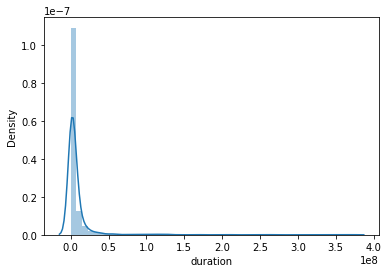

In [20]:
sns.distplot(DuyDuong_playlist_df['duration'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_count', ylabel='Density'>

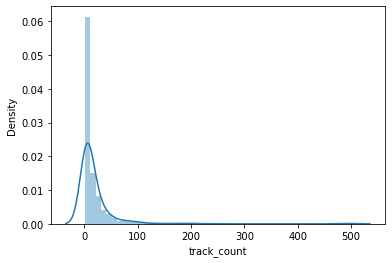

In [21]:
sns.distplot(DuyDuong_playlist_df['track_count'])

### Phân bố các đơn biến trong track

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

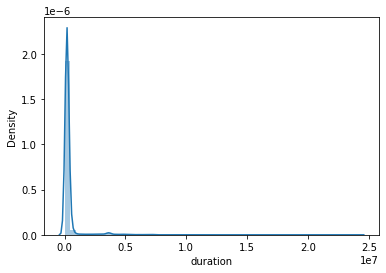

In [22]:
sns.distplot(DuyDuong_track_df['duration'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playback_count', ylabel='Density'>

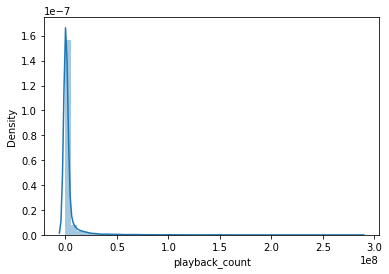

In [23]:
sns.distplot(DuyDuong_track_df['playback_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reposts_count', ylabel='Density'>

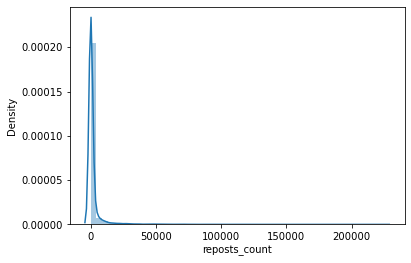

In [24]:
sns.distplot(DuyDuong_track_df['reposts_count'])

### Phân bố các đơn biến trong user

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comments_count', ylabel='Density'>

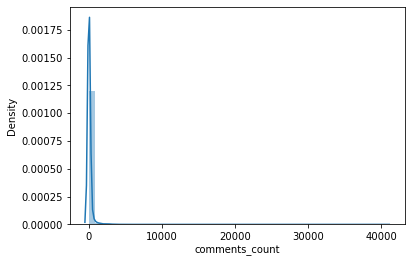

In [25]:
sns.distplot(DuyDuong_user_df['comments_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followers_count', ylabel='Density'>

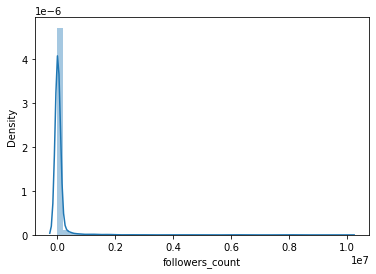

In [26]:
sns.distplot(DuyDuong_user_df['followers_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='followings_count', ylabel='Density'>

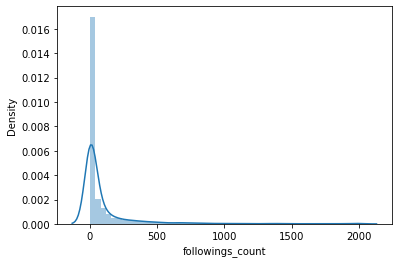

In [27]:
sns.distplot(DuyDuong_user_df['followings_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes_count', ylabel='Density'>

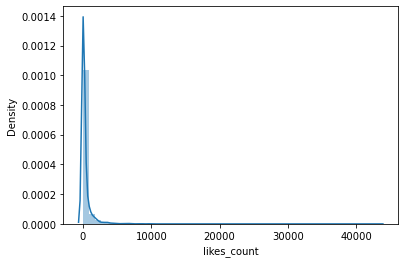

In [28]:
sns.distplot(DuyDuong_user_df['likes_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playlist_likes_count', ylabel='Density'>

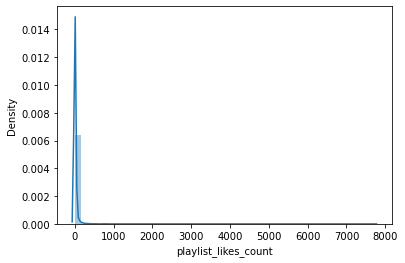

In [29]:
sns.distplot(DuyDuong_user_df['playlist_likes_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='playlist_count', ylabel='Density'>

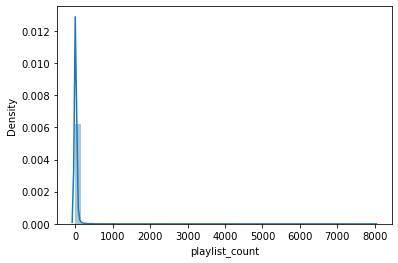

In [30]:
sns.distplot(DuyDuong_user_df['playlist_count'])

/opt/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_count', ylabel='Density'>

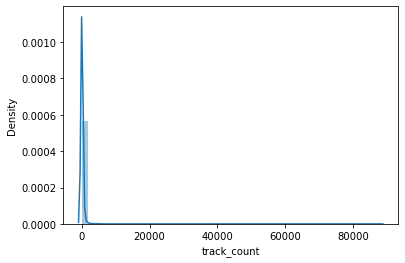

In [31]:
sns.distplot(DuyDuong_user_df['track_count'])

### Các tương quan đa biến trong playlist

Số track trong playlist và thời lượng.

Thường thì càng nhiều track thì thời lượng càng dài?

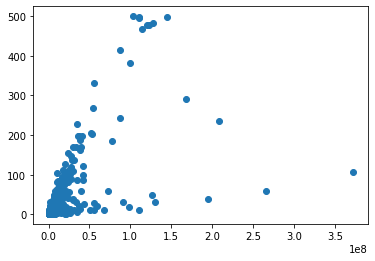

In [32]:
plt.scatter(DuyDuong_playlist_df.duration, DuyDuong_playlist_df.track_count)

### Các tương quan đa biến trong track

Tương quan giữa comment_count và likes_count. 

Muốn biết xem có phải càng nhiều like thì càng nhiều comment?

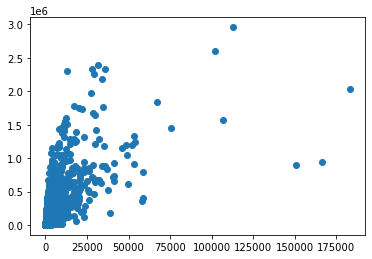

In [33]:
plt.scatter(DuyDuong_track_df.comment_count, DuyDuong_track_df.likes_count)

Tương quan giữa duration và playback

Muốn biết xem thời lượng dài hay ngắn thì người ta xem nhiều hơn

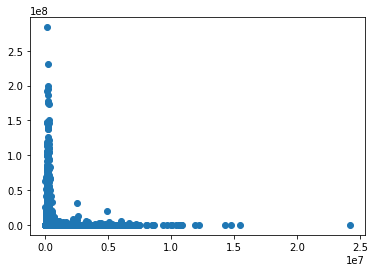

In [34]:
plt.scatter(DuyDuong_track_df.duration, DuyDuong_track_df.playback_count)

Tương quan giữa likes_count và repost_count

Xem có phải càng nhiều lượt thích, người ta lại thích repost?

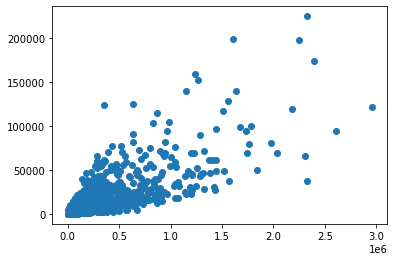

In [35]:
plt.scatter(DuyDuong_track_df.likes_count, DuyDuong_track_df.reposts_count)

Tương quan giữa số lượt thích và số lượt playback

xem có phải càng nhiều người thích, họ lại càng muốn nghe

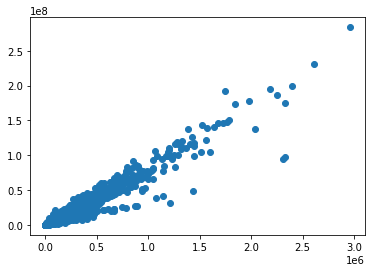

In [36]:
plt.scatter(DuyDuong_track_df.likes_count, DuyDuong_track_df.playback_count)

### Các tương quan đa biến trong user

Tương quan giữa follower và số lượt thích

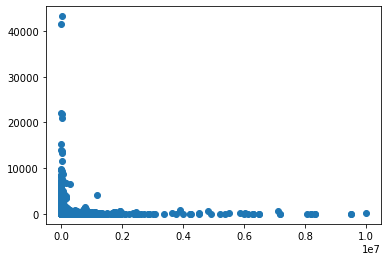

In [37]:
plt.scatter(DuyDuong_user_df.followers_count, DuyDuong_user_df.likes_count)

Tương quan giữa playlist và track user đó có

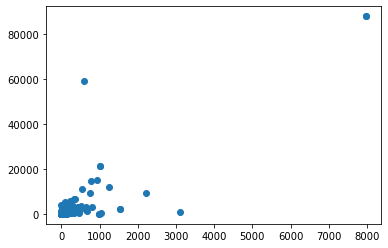

In [38]:
plt.scatter(DuyDuong_user_df.playlist_count, DuyDuong_user_df.track_count)

Tương quan giữa follower và số track người đó có

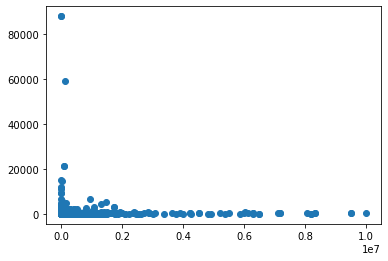

In [39]:
plt.scatter(DuyDuong_user_df.followers_count, DuyDuong_user_df.track_count)

Tương quan giữa comment_count và like count

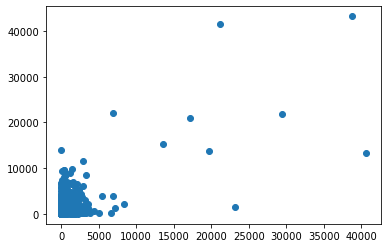

In [40]:
plt.scatter(DuyDuong_user_df.comments_count, DuyDuong_user_df.likes_count)

## Câu hỏi 1: 
Đặt vấn đề: Quan hệ giữa số lượng lượt thích và lượt nghe lại của một track.

Kết quả mong đợi: Nếu 1 track có lượt nghe lại nhiều thì track đó sẽ có nhiều lượt thích 

***Tiền xử lý***

In [41]:
data = {'playback_count': DuyDuong_track_df['playback_count'],  
        'likes_count': DuyDuong_track_df['likes_count']}
df_sort_track=pd.DataFrame(data)
df_sort_track= df_sort_track[df_sort_track['playback_count'].notna()]
df_sort_track = df_sort_track[df_sort_track['likes_count'].notna()]
df_sort_track.sort_values(by=['playback_count'])

,playback_count,likes_count
1295,0.0,0.0
10998,0.0,0.0
10999,0.0,0.0
11000,0.0,0.0
11001,0.0,0.0
...,...,...
664,192416111.0,1745324.0
1205,195879556.0,2181797.0
5096,200195586.0,2396170.0
1154,231274758.0,2610307.0


***Trực quan***

<AxesSubplot:xlabel='playback_count', ylabel='likes_count'>

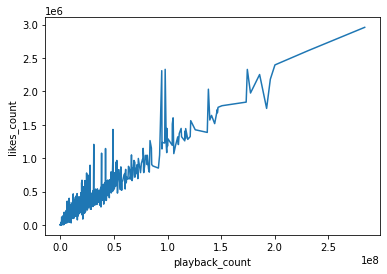

In [42]:
sns.lineplot(x=df_sort_track['playback_count'], y=df_sort_track['likes_count'])

***Kết luận: Nhìn vào đồ thị ta có thể thấy đa số các bài hát có lượt nghe lại càng cao thì sẽ có càng nhiều lượt thích gần đúng so với kết quả mong đợi.***

## Câu hỏi 2: Liệu lượt likes, reposts một playlist mà một người dùng đăng tải có mối tương đồng với số followers của user đó hay không?

Trực quan hóa bằng biểu đồ heatmap trong seaborn. Ta chỉ hiển thị các giá trị có mối tương quan trên 0.5 hoặc dưới -0.4

### Với tập playlist

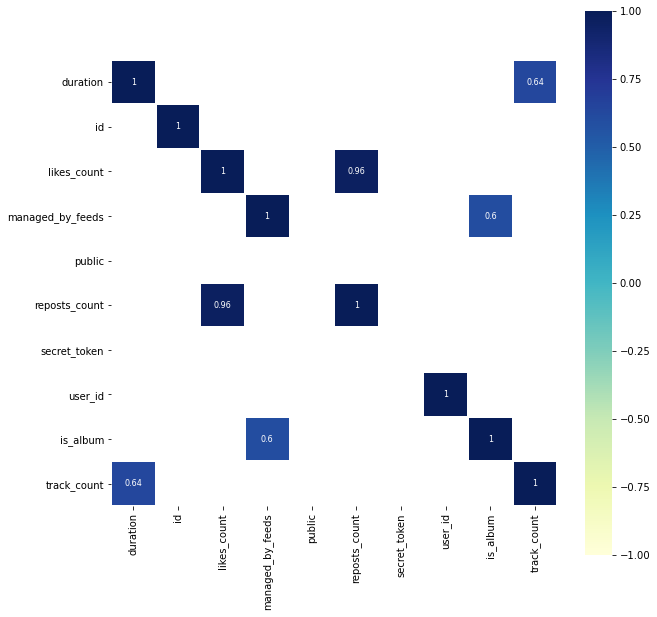

In [43]:
corr = DuyDuong_playlist_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nhận xét:   
- `repost_count` và `likes_count`: playlist được yêu thích nhiều thì sẽ được các tài khoản khác chia sẻ nhiều và ngược lại   
- `reposts_count` và `playback_count`: playlist được nghe càng nhiều thì càng đuợc tài khoản khác chia sẻ nhiều hơn và ngược lại.   

### Với tập track

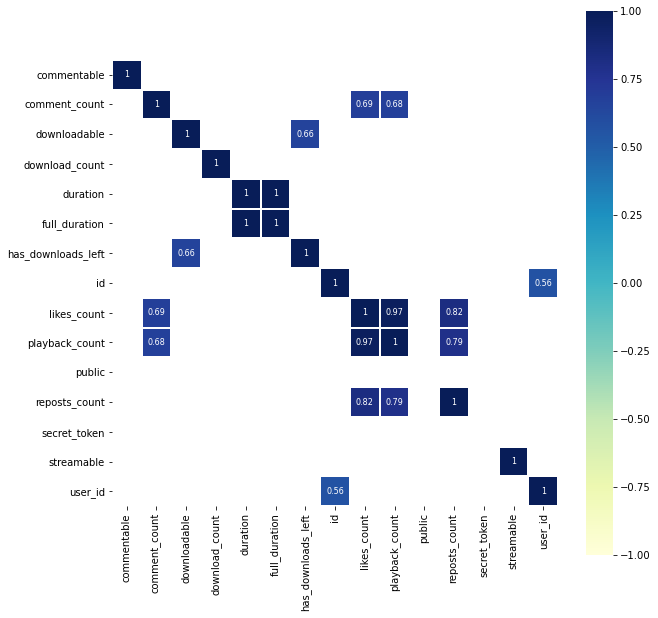

In [44]:
corr = DuyDuong_track_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nhận xét:   
- `likes_count` và `playback_count`: track được yêu thích nhiều thì sẽ được nghe càng nhiều và ngược lại   
- `repost_count` và `likes_count`: track được yêu thích nhiều thì sẽ được các tài khoản khác chia sẻ nhiều và ngược lại   
- `reposts_count` và `playback_count`: track được nghe càng nhiều thì càng đuợc tài khoản khác chia sẻ nhiều hơn và ngược lại.   

### Với tập user

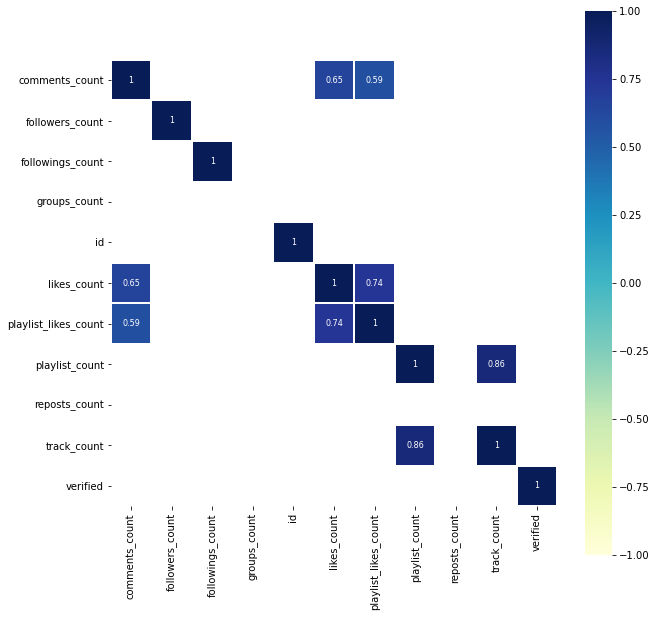

In [45]:
corr = DuyDuong_user_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

#### Nhận xét:
- `playlist_count` và `track_count`: một tài khoản có số lượng track càng nhiều thì số lượng playlist càng nhiều và ngược lại.
- Không có sự liên quan giữa `followers_count` và `playlist_count`: tài khoản có số người theo dõi nhiều thì chưa chắc số playlist sẽ nhiều và ngược lại
- Không có sự liên quan giữa `followers_count` và `likes_count`: tài khoản có số người theo dõi nhiều thì chưa chắc số playlist được yêu thích sẽ nhiều và ngược lại
- `likes_count`, `comments_count`, `playlist_likes_count`: một tài khoản có số lượng yêu thích càng nhiều thì số lượng bình luận càng nhiều, số playlist được yêu thích cũng nhiều, và ngược lại đôi một.

### Trả lời:

- Từ phân tích dữ liệu trong tập `user.csv` thì ta có thể rút ra nhận xét là số lượng người theo dõi (followers) của người dùng trên SoundCloud không có sự liên hệ rõ ràng nào với số lượt thích (likes) hay đăng tải lại (reposts) của track/playlists. 
- Playlist và track được yêu thích nhiều thì sẽ được những người dùng khác đăng tải lại và phát lại nhiều hơn, rút ra nhận xét từ 2 tập `track.csv` và `playlist.csv` 
- Lượt theo dõi cao có thể đến từ tài khoản các nghệ sĩ nổi tiếng đang demo nhạc của mình trên nền tảng này, lượt likes và reposts có thể do có nhiều tài khoản đã yêu thích và chia sẻ lại các track của nghệ sĩ đó và đưa chúng trong playlist nhạc của họ, dẫn đến playlist người dùng đó tạo nên cũng sẽ được thích và chia sẻ nhiều hơn.

## Câu hỏi 3: Top 5 user nào upload nhiều playlist nhất?

Suy ra có user nào spam playlist hay không từ đó loại bỏ những user spam này.

Biết được những người dùng có đóng góp nhiều nhất cho nền tảng và có những hỗ trợ nhằm tạo điều kiện và khuyến khích họ đóng góp thêm nhiều sản phẩm cho nền tảng.

In [46]:
def find_in_list(x, list):
    for i in range(0, len(list)):
        if list[i] == x:
            return i

user = []
count = []

for i in range(0, len(df_pl)):
    if df_pl['user_id'][i] not in user:
        user.append(df_pl['user_id'][i])
        count.append(1)
    else:
        count[find_in_list(df_pl['user_id'][i], user)] += 1

s = {'user': user, 'count': count}
list_user = pd.DataFrame(s)

list_user.sort_values(by=['count'], inplace = True, ascending = False)
print('Top 5 user upload nhiều playlist nhất')
print(list_user.head(n=5))

Top 5 user upload nhiều playlist nhất
           user  count
42   1037343124      5
910  1034556352      3
85   1045980601      3
388   755369407      2
515   523576800      2


Ta thấy nhiều nhất chỉ là 5 playlist nên không có use nào spam playlist.


Trên đây là 5 user upload nhiều playlist nhất lần lượt là user có ID: 1037343124, 1034556352, 1045980601, 755369407, 523576800.

## Câu hỏi 4: Top 5 track nào được xuất hiện nhiều nhất trong các playlist?

Câu hỏi này giúp mình biết được track nào được nhiều người dùng sử dụng để thêm vào playlist của mình từ đó suy ra độ phổ biến của track đó từ đó.


In [47]:
track_list = []
count_track = []

for i in range(0, len(df_pl)):
    for track in str(df_pl['tracks'][i]).split('-'):
        if track not in track_list:
            track_list.append(track)
            count_track.append(1)
        else:
            count_track[find_in_list(track, track_list)] += 1

s = {'track': track_list, 'count': count_track}
list_track = pd.DataFrame(s)

list_track.sort_values(by=['count'], inplace = True, ascending = False)
print('Top 5 track xuát hiện nhiều nhất trong các playlist')
print(list_track.head(n=5))

Top 5 track xuát hiện nhiều nhất trong các playlist
           track  count
1274  1026185437     11
1281  1023058027     10
3239  1071204931      9
2204   833810287      9
1271  1118019910      8


Trong tất cả các playlist thì có bài hát xuất hiện đến tận trong 11 playlist và đó là track có ID: 1026185436 sau đó lần lượt là các track có ID: 1023058027, 1071204931, 833810287 và 1118019910

## Câu hỏi 5: Top 5 quốc gia nào có nhiều lượt follow nhất từ những user của họ?

Quốc gia có lượng follow cao chứng tỏ họ có số lượng user nhiều và user của họ có nhiều lượt follow.

Biết về những quốc gia có số lượng follower cao từ đó biết được những track của quốc gia nào có sự quan tâm lớn từ user SoundCloud.

In [48]:
country_list = []
count_follower = []

for i in range(0, len(df_u)):
    if df_u['country_code'][i] != df_u['country_code'][i]:
        continue
    if df_u['country_code'][i] not in country_list:
        country_list.append(df_u['country_code'][i])
        count_follower.append(df_u['followers_count'][i])
    else:
        count_follower[find_in_list(df_u['country_code'][i], country_list)] += df_u['followers_count'][i]

s = {'country': country_list, 'followers': count_follower}
list_country = pd.DataFrame(s)

list_country.sort_values(by=['followers'], inplace = True, ascending = False)
print('Top 5 track xuát hiện nhiều nhất trong các playlist')
print(list_country.head(n=5))

Top 5 track xuát hiện nhiều nhất trong các playlist
   country  followers
0       US  262280706
10      CA   24151618
6       GB   19086193
19      NL   18650934
61      JM    8644943


Như ta có thể thấy, không bất ngờ khi US có lượng follow khủng lên đến hơn 262 triệu follower. Tiếp theo là Canada, Gabon, Hà Lan và Jamaica

## Câu hỏi 6: Thể loại nào phổ biến nhất trong danh sách New & hot trên nền tảng SoundCloud? 

Kết quả mong đợi:
- Trong bài này, những tracks mới ra lọt vào trending được tổng hợp trong danh sách `New & hot` trên trang SoundCloud.
- Mỗi bài hát đều có thông tin chi tiết về mỗi tracks, từ genres của mỗi tracks, mình hi vọng tìm ra được thể loại mà nhiều bài hát thuộc thể loại đó, từ đó có thể tìm ra được lời giải cho vấn đề mình đặt ra bên trên.

### Bước 1: Thu thập dữ liệu:

1. Qua khảo sát, trang __SoundCloud__ chứa trang con là __Top New and Trending Tracks__ (https://www.soundcloud.com/charts) có tổng hợp và phân loại tracks theo hai category là: __Top 50__ và __New & hot__.
<br>
2. Sử dụng API được cung cấp bởi SoundCloud để thu thập dữ liệu, các tham số để lấy dữ liệu thông qua API như sau:
    - `kind="trending"`: tương ứng với __New & hot__.
    <!-- - kind="top": tương ứng với TOP 50. -->
    - `limit=100`: để lấy tất cả các tracks được cập nhật trong trang này (mặc dù lớn hơn số lượng hiển thị trong web - 50, nhưng hi vọng càng nhiều dữ liệu càng tiện cận gần với kết quả đúng)
    - `client_id`: Địa chỉ client
<br>
3. Lưu dữ liệu vừa thu thập xuống file (charts_trending_data), thuận tiện cho các thao tác xử lý dữ liệu về sau.

Dữ liệu cập nhật lần cuối: `2021-12-11 10:03:30`.
Để đảm bảo các số liệu bên dưới chính xác tại thời điểm báo cáo, mình xin phép comment lại cell code bên dưới. File txt thu thập được đính kèm theo notebook. Có thể uncomment để kiểm tra tính đúng của quá trình lấy dữ liệu.

In [52]:
def re_to_file(url):
    while(True):
        re = requests.get(url)
        re.encoding = 'utf-8'
        if re.status_code == 200:        
            temp = json.loads(re.content)
            if temp:
                print("Last update: ", datetime.datetime.strptime(temp['last_updated'], "%Y-%m-%dT%H:%M:%SZ"))
                with open('charts_trending_data.txt', 'w') as outfile:
                    json.dump(temp, outfile)
            break

client_id = '0QQbTpZ8EsXI2Oz2cY45hz88oskRPlNY'
url = "https://api-v2.soundcloud.com/charts?kind=trending&limit=100&client_id=" + str(client_id)
# re_to_file(url)

Ở đây, ta cũng có thể thấy được list genres ngay trong trang này tại mục categories chọn Genres. Các tên này được lưu vào `list_genres`.

In [53]:
list_genres = ['Alternative Rock','Ambient', 'Classical', 'Country', 
               'Dance & EDM','Dancehall', 'Deep House', 'Disco',
               'Drum & Bass', 'Dubstep', 'Electronic', 'Folk & Singer-Songwriter',
               'Hip-hop & Rap', 'House', 'Indie', 'Jazz & Blues','Latin',
               'Metal', 'Piano', 'Pop','R&B & Soul', 'Reggae', 'Reggaeton', 
               'Rock', 'Soundtrack' , 'Techno','Trance','Trap', 'Triphop','World']

### Bước 2: Tiền xử lý dữ liệu:

Dữ liệu nằm dưới file txt là một response trả về từ trang web, ta cần tải lên và xử lý dữ liệu thô này.

In [54]:
with open("charts_trending_data.txt") as json_file:
    raw_data = json.load(json_file)

Xem `raw_data` này có chứa những gì?

In [55]:
raw_data

{'kind': 'trending',
 'last_updated': '2021-12-11T10:03:30Z',
 'collection': [{'track': {'artwork_url': 'https://i1.sndcdn.com/artworks-qkyK8tXNTszTnSuo-rNXMvQ-large.jpg',
    'caption': None,
    'commentable': True,
    'comment_count': 4936,
    'created_at': '2021-12-03T01:16:28Z',
    'description': '',
    'downloadable': False,
    'download_count': 0,
    'duration': 189780,
    'full_duration': 189780,
    'embeddable_by': 'all',
    'genre': 'Hip-hop & Rap',
    'has_downloads_left': False,
    'id': 1170962914,
    'kind': 'track',
    'label_name': None,
    'last_modified': '2021-12-11T13:05:40Z',
    'license': 'all-rights-reserved',
    'likes_count': 59925,
    'permalink': 'wandered-to-la-ft-justin-bieber',
    'permalink_url': 'https://soundcloud.com/uiceheidd/wandered-to-la-ft-justin-bieber',
    'playback_count': 1746991,
    'public': True,
    'publisher_metadata': {'id': 1170962914,
     'urn': 'soundcloud:tracks:1170962914',
     'artist': 'Juice WRLD, Justin Bi

Bên trong một `collection`, ta thấy danh sách các tracks có chung cấu trúc. Thử xem một `track` gồm những trường dữ liệu nào?

In [56]:
raw_data['collection'][0]['track']

{'artwork_url': 'https://i1.sndcdn.com/artworks-qkyK8tXNTszTnSuo-rNXMvQ-large.jpg',
 'caption': None,
 'commentable': True,
 'comment_count': 4936,
 'created_at': '2021-12-03T01:16:28Z',
 'description': '',
 'downloadable': False,
 'download_count': 0,
 'duration': 189780,
 'full_duration': 189780,
 'embeddable_by': 'all',
 'genre': 'Hip-hop & Rap',
 'has_downloads_left': False,
 'id': 1170962914,
 'kind': 'track',
 'label_name': None,
 'last_modified': '2021-12-11T13:05:40Z',
 'license': 'all-rights-reserved',
 'likes_count': 59925,
 'permalink': 'wandered-to-la-ft-justin-bieber',
 'permalink_url': 'https://soundcloud.com/uiceheidd/wandered-to-la-ft-justin-bieber',
 'playback_count': 1746991,
 'public': True,
 'publisher_metadata': {'id': 1170962914,
  'urn': 'soundcloud:tracks:1170962914',
  'artist': 'Juice WRLD, Justin Bieber',
  'contains_music': True,
  'isrc': 'USUG12105746'},
 'purchase_title': None,
 'purchase_url': None,
 'release_date': None,
 'reposts_count': 1875,
 'secret

Vì chúng có cùng cấu trúc, ta tạo một DataFrame chứa dữ liệu cho xử lý, tức là phần dữ liệu `tracks` nằm trong `collection`. Một vài thuộc tính sẽ còn chia nhỏ hơn, mình sẽ tiếp tục quay lại xử lý nếu cần thiết.

In [57]:
trending_df = pd.DataFrame()
for i in range(len(raw_data['collection'])):
    trending_df = trending_df.append(pd.DataFrame.from_dict(
        raw_data['collection'][i]['track'], 
        orient='index').transpose(), 
        ignore_index=True)

In [58]:
trending_df.shape

(98, 48)

Ở hiện tại, dữ liệu có tất cả 98 bản ghi và 48 thuộc tính.

### Bước 3: Lấy insight từ data:

#### Phần 1: Kiểm tra tính đúng của Genres

Tạo một DataFrame `genres_df` từ `trending_df`, thuận tiện cho xử lý riêng về thuộc tính Genres.

In [59]:
genres_df = trending_df['genre']

`gener` là một thuộc tính dạng `categorical`. Kiểm tra xem có bao nhiêu giá trị rỗng trong thuộc tính genre?

In [60]:
sum(genres_df == "")

36

Ở phiên bản hiện tại, có 36 giá trị rỗng, thời điểm người kiểm tra run notebook này có thể sẽ thay đổi. Nếu như xem bảng trending như một bảng xếp hạng từ [0-100], mình muốn xem phân bố của các giá trị rỗng này như thế nào?

In [61]:
# Tim index
empty_genre = genres_df[genres_df == ""]

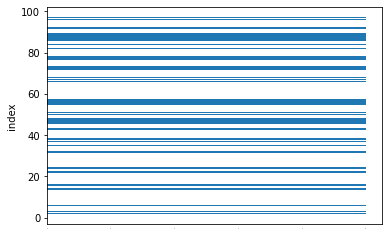

In [62]:
plt.barh(empty_genre.index, 1)
plt.tick_params(axis='x', which='both', length=0, labelsize=0)
plt.ylabel('index', )
plt.show;

Giới hạn trong bài toán này là các bài hát nằm trong __New & hot__ của SoundCloud, vì vậy phương án thu thập thêm dữ liệu được loại bỏ. Mặt khác, yêu cầu bài toán là làm sao tìm ra được tên gọi của thể loại (genre), do đó không có tên phù hợp cho rỗng trong trường hợp này. Kết luận, mình sẽ tiến hành loại bỏ các dòng dữ liệu chứa giá trị rỗng.

In [63]:
genres_df = genres_df[genres_df != ""]

#### Phần 2: Chuẩn hóa dữ liệu

Xem các giá trị khác nhau trong thuộc tính `genre` gồm những giá trị nào?

In [64]:
np.unique(genres_df)

array(['Alternative Rock', 'Classical', 'DJ LG DO SF', 'Drum & Bass',
       'FUNK DO MAIOR DE MINAS', 'Hip Hop', 'Hip Hop/Rap',
       'Hip-hop & Rap', 'House', 'Indie', 'OST', 'Pop', 'R&B & Soul',
       'Rap', 'Trap', 'Trap Brasileiro ®', 'World', 'maharagan',
       'maharaganat'], dtype=object)

Xem lại các `list_genres` mình vừa lưu lại từ trang web ở đầu bài.

In [65]:
print(list_genres)

['Alternative Rock', 'Ambient', 'Classical', 'Country', 'Dance & EDM', 'Dancehall', 'Deep House', 'Disco', 'Drum & Bass', 'Dubstep', 'Electronic', 'Folk & Singer-Songwriter', 'Hip-hop & Rap', 'House', 'Indie', 'Jazz & Blues', 'Latin', 'Metal', 'Piano', 'Pop', 'R&B & Soul', 'Reggae', 'Reggaeton', 'Rock', 'Soundtrack', 'Techno', 'Trance', 'Trap', 'Triphop', 'World']


Đối sánh giữa các giá trị khác nhau của `genres_df` với `list_genres`, ta có các giá trị không nằm trong `list_genres` sau:

In [66]:
for i in np.unique(genres_df):
    if i not in list_genres:
        print(i)

DJ LG DO SF
FUNK DO MAIOR DE MINAS
Hip Hop
Hip Hop/Rap
OST
Rap
Trap Brasileiro ®
maharagan
maharaganat


Ta thấy:
1. `Hip hop/Rap` tương tự với `Hip-hop & Rap`. Hơn nữa, `Hip hop` và `Rap` cũng nằm trong `Hip-hop & Rap`, ta đổi các giá trị này về giá trị mới là `Hip-hop & Rap`.
2. `maharagan, maharaganat` là một thể loại EDM, nằm trong `Dance & EDM` (https://en.wikipedia.org/wiki/Mahraganat), ta đổi sang giá trị mới là `Dance & EDM`.
3. `Trap Brasileiro ®` là một thể loại nằm trong `Trap` (https://pt.wikipedia.org/wiki/Trap), ta đổi sang giá trị mới là `Trap`.
4. `OST` là viết tắt của cụm từ Original Soundtrack, nằm trong `Soundtrack` (https://en.wikipedia.org/wiki/Soundtrack), ta đổi sang giá trị mới là `Soundtrack`.

In [67]:
genres_df[genres_df == "Hip Hop/Rap"] = "Hip-hop & Rap"
genres_df[genres_df == "Hip Hop"] = "Hip-hop & Rap"
genres_df[genres_df == "Rap"] = "Hip-hop & Rap"
genres_df[genres_df == "maharagan"] = "Dance & EDM"
genres_df[genres_df == "maharaganat"] = "Dance & EDM"
genres_df[genres_df == "Trap Brasileiro ®"] = "Trap"
genres_df[genres_df == "OST"] = "Soundtrack"
genres_df

0     Hip-hop & Rap
1     Hip-hop & Rap
4     Hip-hop & Rap
5              Trap
7     Hip-hop & Rap
          ...      
90    Hip-hop & Rap
91    Hip-hop & Rap
93        Classical
94    Hip-hop & Rap
95    Hip-hop & Rap
Name: genre, Length: 62, dtype: object

Kiểm tra xem các giá trị khác nhau trong thuộc tính `genres` đã nằm trong `list_genres` chưa?

In [68]:
for i in np.unique(genres_df):
    if i not in list_genres:
        print(i)

DJ LG DO SF
FUNK DO MAIOR DE MINAS


#### Phần 3: Xác định outlier:

Như vậy, dựa vào kết quả của phần trước cũng như tìm kiếm thông tin trên mạng, mình nhận thấy tên của genres là `DJ LG DO SF` và `FUNK DO MAIOR DE MINAS` không khớp với bất kì thể loại nhạc nào. Mình xác định đây là outlier. Mình sẽ kiểm tra toàn bộ dữ liệu của outlier này lần cuối.

In [69]:
genre_outlier = []
for i in np.unique(genres_df):
    if i not in list_genres:
        genre_outlier.append(i)

In [70]:
for i in range(len(trending_df)):
    if trending_df['genre'][i] in genre_outlier:
        print(trending_df.iloc[i, :], end='\n--------------------\n')

artwork_url            https://i1.sndcdn.com/artworks-VkS7zYIAaqx4J80...
caption                                           FUNK DO MAIOR DE MINAS
commentable                                                         True
comment_count                                                       1679
created_at                                          2021-12-02T19:19:35Z
description            GORDAO DO PC E GUI MARQUES\n\nags adicionais\n...
downloadable                                                        True
download_count                                                       456
duration                                                          166191
full_duration                                                     166191
embeddable_by                                                        all
genre                                             FUNK DO MAIOR DE MINAS
has_downloads_left                                                  True
id                                                 

Loại bỏ outlier:

In [71]:
for i in genre_outlier:
    genres_df = genres_df[genres_df != i]

#### Phần 4: Kiểm tra tính đúng của New & Hot:

Bên trên, mình kiểm tra tính đúng của __Genres__, kế tiếp mình kiểm tra tính đúng của __New & Hot__ được tính dựa vào thuộc tính `created_at` trong `collection`.

In [72]:
create_date_df = trending_df['created_at']
for i in range(len(create_date_df)):
    create_date_df.iloc[i] = datetime.datetime.strptime(str(trending_df['created_at'][i]),"%Y-%m-%dT%H:%M:%SZ")
create_date_df

0     2021-12-03 01:16:28
1     2021-12-03 03:44:57
2     2021-12-04 07:27:00
3     2021-12-06 22:32:05
4     2021-12-07 02:01:04
             ...         
93    2021-12-03 17:07:27
94    2021-11-29 23:37:39
95    2021-12-01 14:01:06
96    2021-12-07 05:43:24
97    2021-12-07 16:35:33
Name: created_at, Length: 98, dtype: object

In [73]:
sum((datetime.datetime.now() - create_date_df) > datetime.timedelta(30))

0

Như vậy, tất cả các ngày đều có số ngày cách thời điểm hiện tại dưới 30 ngày, điều đó chứng tỏ đây đều là những bài hát mới trên nền tảng SoundCloud.

#### Phần 5: Kết luận:

Quay trở lại với `genres_df`, mình xem tần suất xuất hiện để tìm ra thể loại theo vấn đề đặt đầu bài.

In [74]:
names, counts = np.unique(genres_df, return_counts=True)
total_genres = pd.DataFrame(counts, index=names, columns=["counts"])
total_genres.sort_values(['counts'], ascending=False)

,counts
Hip-hop & Rap,40
World,4
Trap,3
Dance & EDM,2
House,2
Pop,2
R&B & Soul,2
Alternative Rock,1
Classical,1
Drum & Bass,1


Như vậy, thể loại `"Hip-hop & Rap"` là thể loại phổ biến nhất trong danh sách `New & hot` trên trang SoundCloud tại thời điểm: `2021-12-11 10:03:30`.

#### Phần 6: Tìm hiểu thêm về tính hot trong dữ liệu:

Ở phần này, tính hot được tính toán và ghi lại trong thuộc tính `score` ứng với từng tracks tìm được trong response. Mình chỉ chọn ra vài thuộc tính thuộc loại `numerical`, mục đích để xử lý và visuallization.

In [75]:
numerical_col = ['comment_count', 'download_count', 'likes_count', 'playback_count','reposts_count']

In [76]:
numerical_df = trending_df[numerical_col]
numerical_df = numerical_df.apply(pd.to_numeric)
numerical_df.head()

,comment_count,download_count,likes_count,playback_count,reposts_count
0,4936.0,0,59925,1746991,1875
1,508.0,0,36561,1224547,451
2,11847.0,1000,78540,986094,6140
3,190.0,0,12950,450966,153
4,615.0,0,14541,298956,277


In [77]:
numerical_df.describe(include='all')

,comment_count,download_count,likes_count,playback_count,reposts_count
count,97.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,366.000000,19.551020,12766.163265,2.712207e+05,228.102041
std,1300.692316,111.723805,13835.817089,2.947792e+05,646.384815
min,1.000000,0.000000,563.000000,2.592600e+04,5.000000
25%,37.000000,0.000000,2654.250000,6.216825e+04,37.250000
50%,117.000000,0.000000,7987.500000,1.464630e+05,114.500000
75%,281.000000,0.000000,18014.750000,4.276538e+05,216.000000
max,11847.000000,1000.000000,78540.000000,1.746991e+06,6140.000000


`comment_count` có 97 giá trị khác non-NA/null trong 98 dòng dữ liệu.

In [78]:
numerical_df[numerical_df['comment_count'].isnull()]

,comment_count,download_count,likes_count,playback_count,reposts_count
7,NaN,0,3005,129959,43


Nếu xem `index` tương đương với vị trí (rank) trong bảng xếp hạng trending, thì mình tạm dùng `index` như vị trí. Mình xem mối tương quan giữa vị trí và các thuộc tính trong `numerical_df`.

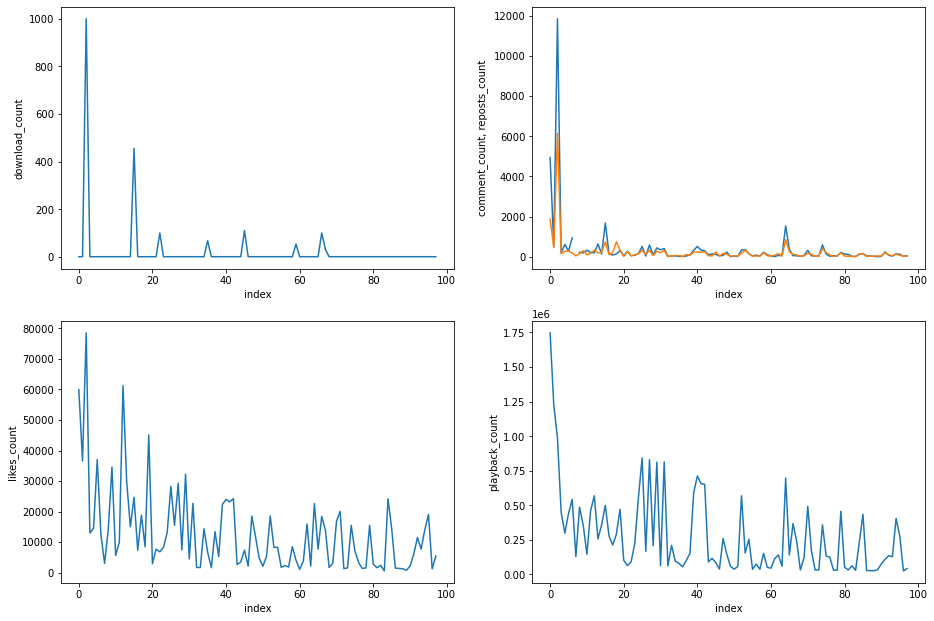

In [79]:
fig, ax = plt.subplots(2,2)
fig.subplots_adjust(left=0, right=2, top=2, bottom=0, hspace=0.2, wspace=0.2)

ax[0, 0].plot(numerical_df['download_count'])
ax[1, 0].plot(numerical_df['likes_count'])
ax[0, 1].plot(numerical_df['comment_count'])
ax[0, 1].plot(numerical_df['reposts_count'])
ax[1, 1].plot(numerical_df['playback_count'])

ax[0, 0].set_xlabel('index')
ax[0, 0].set_ylabel('download_count')
ax[1, 0].set_xlabel('index')
ax[1, 0].set_ylabel('likes_count')
ax[0, 1].set_xlabel('index')
ax[0, 1].set_ylabel('comment_count, reposts_count')
ax[1, 1].set_xlabel('index')
ax[1, 1].set_ylabel('playback_count')

plt.show()

- Dễ dàng thấy, các tracks có lượt like, lượt nghe cao giúp các tracks có tăng độ hot và đứng đầu bảng xếp hạng. Lượt tải, lượt bình luận, lượt repost cũng tập trung ở các tracks đứng đầu bảng xếp hạng.
- Hai thuộc tính là `comment_count` và `reposts_count` có biến động tương tự nhau. Hai thuộc tính đạt giá trị cao tập trung ở các tracks đứng đầu.

---